In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import statsmodels.api as sm

In [3]:
df = pd.read_csv("powerconsumption.csv")

In [4]:
df.head(3)

,Datetime,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3
0,1/1/2017 0:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386
1,1/1/2017 0:10,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434
2,1/1/2017 0:20,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52416 entries, 0 to 52415
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Datetime                52416 non-null  object 
 1   Temperature             52416 non-null  float64
 2   Humidity                52416 non-null  float64
 3   WindSpeed               52416 non-null  float64
 4   GeneralDiffuseFlows     52416 non-null  float64
 5   DiffuseFlows            52416 non-null  float64
 6   PowerConsumption_Zone1  52416 non-null  float64
 7   PowerConsumption_Zone2  52416 non-null  float64
 8   PowerConsumption_Zone3  52416 non-null  float64
dtypes: float64(8), object(1)
memory usage: 3.6+ MB


In [6]:
df['Datetime'] = pd.to_datetime(df['Datetime'])

In [7]:
df.corr()

C:\Users\ehedr\AppData\Local\Temp\ipykernel_12208\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3
Temperature,1.000000,-0.460243,0.477109,0.460294,0.196522,0.440221,0.382428,0.489527
Humidity,-0.460243,1.000000,-0.135853,-0.468138,-0.256886,-0.287421,-0.294961,-0.233022
WindSpeed,0.477109,-0.135853,1.000000,0.133733,-0.000972,0.167444,0.146413,0.278641
GeneralDiffuseFlows,0.460294,-0.468138,0.133733,1.000000,0.564718,0.187965,0.157223,0.063376
DiffuseFlows,0.196522,-0.256886,-0.000972,0.564718,1.000000,0.080274,0.044667,-0.038506
PowerConsumption_Zone1,0.440221,-0.287421,0.167444,0.187965,0.080274,1.000000,0.834519,0.750733
PowerConsumption_Zone2,0.382428,-0.294961,0.146413,0.157223,0.044667,0.834519,1.000000,0.570932
PowerConsumption_Zone3,0.489527,-0.233022,0.278641,0.063376,-0.038506,0.750733,0.570932,1.000000


In [8]:
#Добавление колонки с суммой электроэнергии по трем зонам
df['PC_Sum']=df["PowerConsumption_Zone1"]+df["PowerConsumption_Zone2"]+df["PowerConsumption_Zone3"]

In [9]:
df.describe()

,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3,PC_Sum
count,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000
mean,18.810024,68.259518,1.959489,182.696614,75.028022,32344.970564,21042.509082,17835.406218,71222.885864
std,5.815476,15.551177,2.348862,264.400960,124.210949,7130.562564,5201.465892,6622.165099,17143.138964
min,3.247000,11.340000,0.050000,0.004000,0.011000,13895.696200,8560.081466,5935.174070,36785.039739
25%,14.410000,58.310000,0.078000,0.062000,0.122000,26310.668692,16980.766032,13129.326630,56499.074640
50%,18.780000,69.860000,0.086000,5.035500,4.456000,32265.920340,20823.168405,16415.117470,69788.790940
75%,22.890000,81.400000,4.915000,319.600000,101.000000,37309.018185,24713.717520,21624.100420,83749.172310
max,40.010000,94.800000,6.483000,1163.000000,936.000000,52204.395120,37408.860760,47598.326360,134208.145950


In [10]:
x, y = df.Temperature, df.PC_Sum

In [15]:
x.mean(), y.mean()

(18.81002396214896, 71222.88586428425)

In [14]:
n = x.size
n

52416

In [16]:
x.std(), y.std()

(5.8154758389084265, 17143.138963686677)

In [17]:
b = ((x-x.mean())*(y-y.mean())).sum()/((x-x.mean())**2).sum()
b

1439.2526973058907

In [18]:
a = y.mean() - b*x.mean()
a

44150.50814037293

In [19]:
xx = sm.add_constant(x)
xx

,const,Temperature
0,1.0,6.559
1,1.0,6.414
2,1.0,6.313
3,1.0,6.121
4,1.0,5.921
...,...,...
52411,1.0,7.010
52412,1.0,6.947
52413,1.0,6.900
52414,1.0,6.758


Построение линейной регрессии с помощью метода наименьших квадратов

In [20]:
model = sm.OLS(y, xx)

In [21]:
trained_model = model.fit()

In [22]:
trained_model.params, a, b

(const          44150.508140
 Temperature     1439.252697
 dtype: float64,
 44150.50814037293,
 1439.2526973058907)

In [23]:
trained_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 PC_Sum   R-squared:                       0.238
Model:                            OLS   Adj. R-squared:                  0.238
Method:                 Least Squares   F-statistic:                 1.640e+04
Date:                Sun, 30 Oct 2022   Prob (F-statistic):               0.00
Time:                        13:05:51   Log-Likelihood:            -5.7826e+05
No. Observations:               52416   AIC:                         1.157e+06
Df Residuals:                   52414   BIC:                         1.157e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        4.415e+04    221.240    199.559      0.000    4.37e+04    4.46e+04
Temperature  1439.2527     11.237    128.081      0.000    1417.228    1461.277
==============================================================================
Omnibus:                     2700.128   Durbin-Watson:                   0.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2996.976
Skew:                           0.568   Prob(JB):                         0.00
Kurtosis:                       2.713   Cond. No.                         66.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

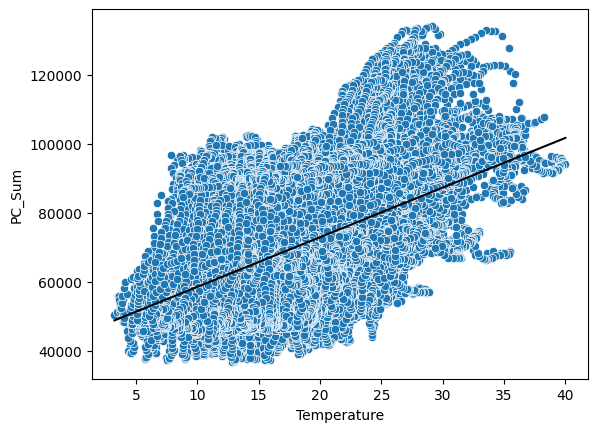

In [24]:
sns.scatterplot(x=x, y=y)
xx = np.linspace(x.min(), x.max(), 10)
yy = a + b*xx
sns.lineplot(x=xx, y=yy, color='k');

In [78]:
s_e = ((resid**2).sum()/(n-2))**(1/2)
s_e

14961.136330675385

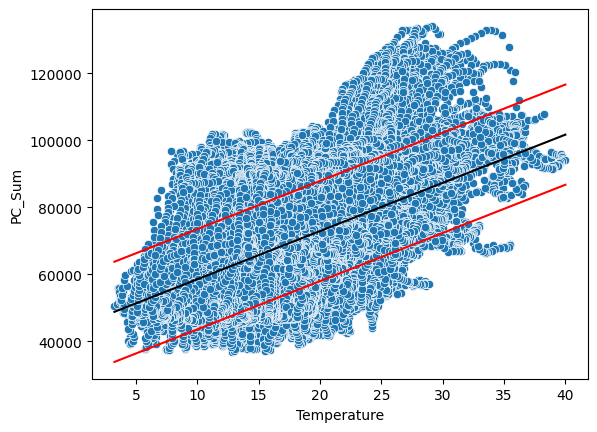

In [79]:
sns.scatterplot(x=x, y=y)
xx = np.linspace(x.min(), x.max(), 10)
yy = a + b*xx
sns.lineplot(x=xx, y=yy, color='k')
sns.lineplot(x=xx, y=yy+s_e, color='r')
sns.lineplot(x=xx, y=yy-s_e, color='r');

In [26]:
df[['Temperature', 'PC_Sum']].corr()

,Temperature,PC_Sum
Temperature,1.000000,0.488238
PC_Sum,0.488238,1.000000


<AxesSubplot: ylabel='PC_Sum'>

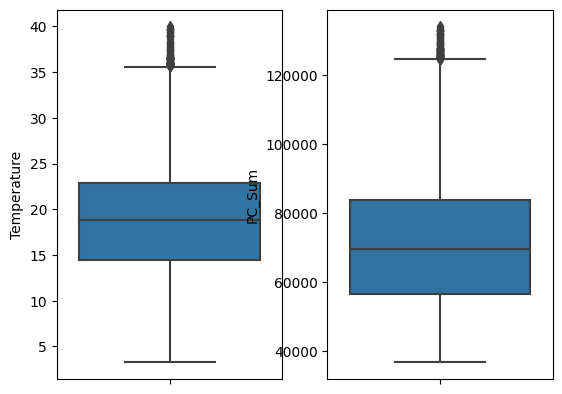

In [28]:
fig, ax = plt.subplots(1,2)
sns.boxplot(data=df, y='Temperature', ax=ax[0])
sns.boxplot(data=df, y='PC_Sum', ax=ax[1])

In [29]:
ssto = sum((y-y.mean())**2)
ssto

15404098297084.32

График остатков

In [30]:
y_hat = a + b*x

In [31]:
resid = y-y_hat
resid

0        16834.968858
1        15938.968929
2        14566.711512
3        12529.058189
4        10978.122909
             ...     
52411    18558.417042
52412    16834.811231
52413    14593.697898
52414    13286.038951
52415    12129.748871
Length: 52416, dtype: float64

<AxesSubplot: xlabel='Temperature'>

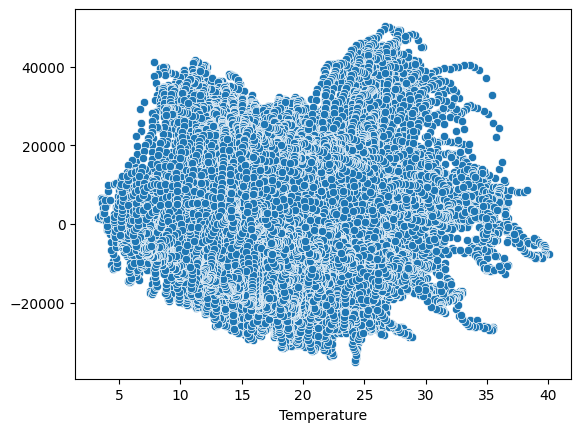

In [32]:
sns.scatterplot(x=x, y=resid)

Text(0.5, 1.0, 'QQplot')

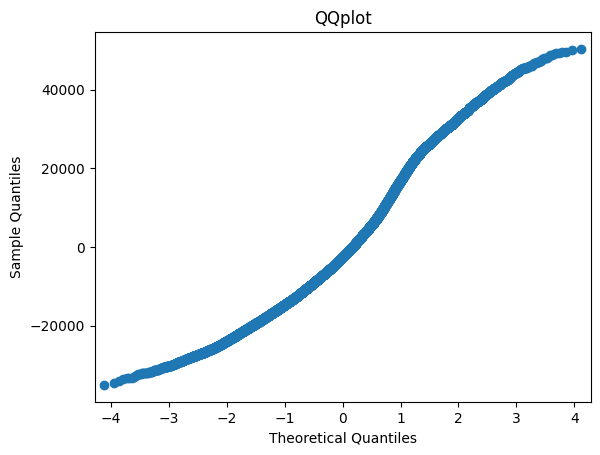

In [33]:
sm.qqplot(resid)
plt.title('QQplot')

<AxesSubplot: >

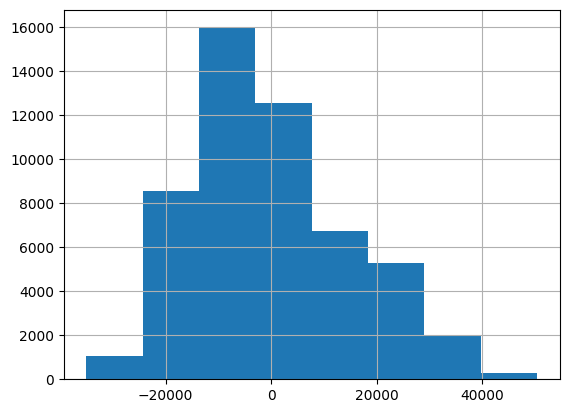

In [37]:
resid.hist(bins = 8)

Проверка нормальности распределения

In [36]:
import scipy

stat, p = scipy.stats.shapiro(df['PC_Sum']) # тест Шапиро-Уилк
print('Statistics=%.3f, p-value=%.3f' % (stat, p))

alpha = 0.05
if p > alpha:
    print('Принять гипотезу о нормальности')
else:
    print('Отклонить гипотезу о нормальности')

Statistics=0.967, p-value=0.000
Отклонить гипотезу о нормальности


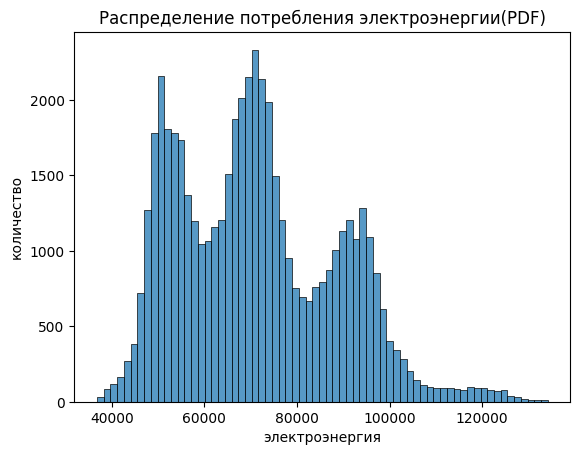

In [50]:
sns.histplot(df['PC_Sum'])
plt.ylabel("количество")
plt.xlabel("электроэнергия")
plt.title("Распределение потребления электроэнергии(PDF)");

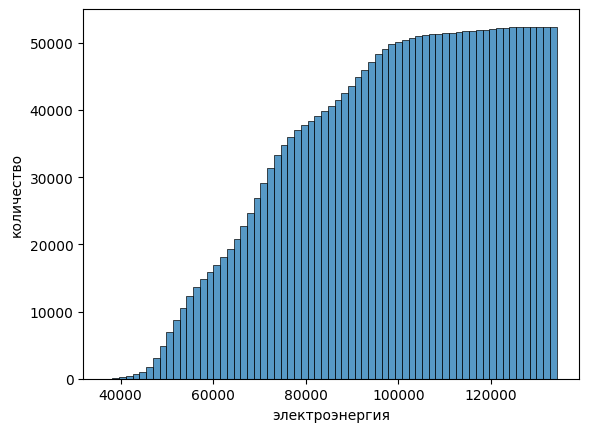

In [49]:
sns.histplot(df["PC_Sum"], cumulative = True)
plt.ylabel("количество")
plt.xlabel("электроэнергия");